# Big Mart Sales Prediction


## Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.


## About the DataSet :
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

|Features|Description|
|-----|-----|
|Item_Identifier|Unique product ID|
|Item_Weight|Weight of product|
|Item_Fat_Content|Whether the product is low fat or not|
|Item_Visibility|The % of total display area of all products in a store allocated to the particular product|
|Item_Type|The category to which the product belongs|
|Item_MRP|Maximum Retail Price (list price) of the product|
|Outlet_Identifier|Unique store ID|
|Outlet_Establishment_Year|The year in which store was established|
|Outlet_Size|The size of the store in terms of ground area covered|
|Outlet_Location_Type|The type of city in which the store is located|
|Outlet_Type|Whether the outlet is just a grocery store or some sort of supermarket|
|Item_Outlet_Sales|Sales of the product in the particular store. This is the outcome variable to be predicted.|
|source|is it a train data or test data point|

**Kaggle Notebook:** Please click [here](https://www.kaggle.com/hirenkelaiya/big-mart-sales-prediction)

In [60]:
!pip install comet_ml

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [61]:
# import comet_ml at the top of your file
from comet_ml import Experiment

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
comet_api_key = user_secrets.get_secret("cometmlkey")

In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-salescsv/Train_UWu5bXk.csv
/kaggle/input/big-mart-salescsv/Test_u94Q5KV.csv


In [63]:
import matplotlib.pyplot as plt

# Set plot size
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# 1. Read data and initial observation

In [64]:
data = pd.read_csv('/kaggle/input/big-mart-salescsv/Train_UWu5bXk.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
data.shape

(8523, 12)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [67]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

***Observation:***
 - Item weight and outlet size have missing values

# 2. Exploratory Data Analysis (EDA)

## 2.1 Visibility vs Sales

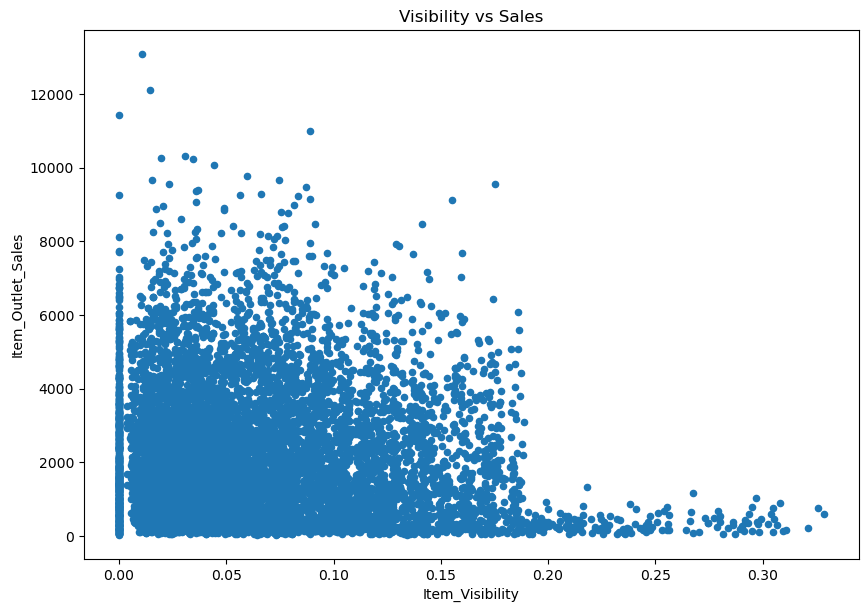

In [68]:
data.plot.scatter(x='Item_Visibility', y='Item_Outlet_Sales', title='Visibility vs Sales')
plt.show()

***Insights:***
 - Item visibility greater than 0.18 has low sales

## 2.2 Outlet vs Sales

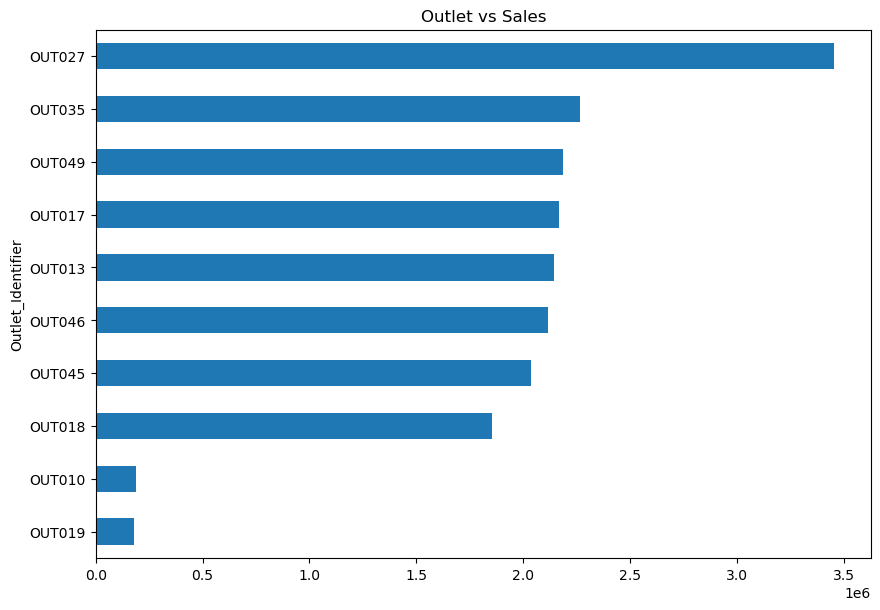

In [69]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().sort_values().plot.barh(title='Outlet vs Sales')
plt.show()

***Insights:***
 - Outlet 27 has highest sales whereas outlet 10 and 19 shows lowest sales

## 2.3 Item Type vs Sales

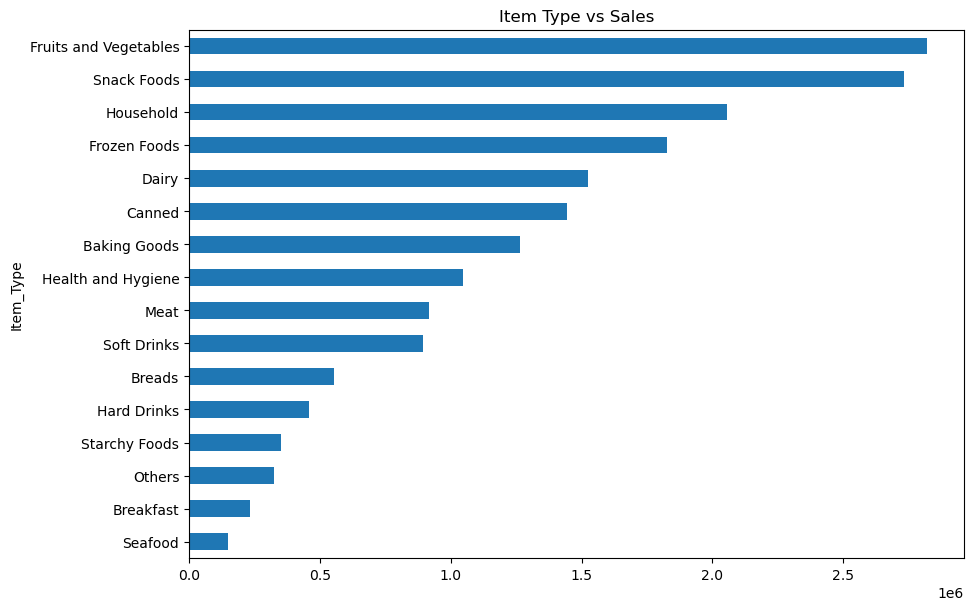

In [70]:
data.groupby('Item_Type')['Item_Outlet_Sales'].sum().sort_values().plot.barh(title='Item Type vs Sales')
plt.show()

***Insights:***
 - Fruits and Vegitables and snacks are among the top selling items while breakfast and seafood have lowest sales

### Feature Engineering Ideas:

 - Create a levelled visibility - Low, High
 - Reduce Item Type categories to Food, Drink, Non-consumable
 - Operational Year since opening (e.g. 2013 - Established year)

# 3. Data Pre-Processing

In [71]:
data.select_dtypes(include='object').columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### 3.1 Treat Item Fat Content

In [72]:
data['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [73]:
data['Item_Fat_Content'].replace(to_replace=['LF', 'low fat'], value='Low Fat', inplace=True)
data['Item_Fat_Content'].replace(to_replace=['reg'], value='Regular', inplace=True)
data['Item_Fat_Content'].value_counts(dropna=True)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### 3.2 Impute Null Values

Two features have null values:
 1. Item_Weight
 2. Outlet_Size

#### 3.2.1 Impute null values for Item_Weight

In [74]:
data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDX20     9
NCQ06     9
FDG09     9
         ..
FDT35     1
FDE52     1
FDY43     1
FDO33     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [75]:
data.groupby('Item_Identifier')['Item_Weight'].transform('mean')

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [76]:
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Identifier')['Item_Weight'].transform('mean'))
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There's still we have 4 null values. Let's impute using Item_Type

In [77]:
data['Item_Weight'] = data['Item_Weight'].fillna(data.groupby('Item_Type')['Item_Weight'].transform('mean'))
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### 3.2.2 Impute null values for Outlet_Size

In [78]:
data['Outlet_Size'].value_counts(dropna=False)

Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [79]:
pd.crosstab(index=data['Outlet_Size'], columns=data['Outlet_Type'])

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


All grocery stores are small

In [80]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Type'].map({'Grocery Store': 'Small'}))
data['Outlet_Size'].value_counts(dropna=False)

Small     2943
Medium    2793
NaN       1855
High       932
Name: Outlet_Size, dtype: int64

In [81]:
pd.crosstab(index=data['Outlet_Size'], columns=data['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Size,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,555


All Tier 2 stores are small

In [82]:
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Location_Type'].map({'Tier 2': 'Small'}))
data['Outlet_Size'].value_counts(dropna=False)

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [83]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 3.3 Feature Encoding

In [84]:
data.select_dtypes(include=[object]).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [85]:
drop_cols = ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales']
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [86]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [87]:
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052


# 4. Model Building

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection  import train_test_split
from sklearn.metrics import  make_scorer, mean_squared_error

In [89]:
# Split the data
X = data.drop(drop_cols, axis=1)
y = data['Item_Outlet_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
# Fit linear model and predict
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

In [104]:
accuracy = lr.score(X_val, y_val)
accuracy

0.5151558658506841

In [105]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

1191.2475129841107

### 4.1 Logging experiment on Comet.ml

In [94]:
params = {
    'random_state': 0,
    'model_type': 'lr',
    'scaler': 'N',
    'param_grid': 'N'
}

metrics = {
    'accuracy': accuracy,
    'rmse': rmse
}

# Create an experiment with comel.ml key
exp = Experiment(
    api_key= comet_api_key,
    project_name='big-mart-sales-prediction',
    workspace='hirenhk15'
)
exp.log_dataset_hash(X_train)
exp.log_parameters(params)
exp.log_metrics(metrics)
exp.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hirenhk15/big-mart-sales-prediction/2f10aad37a9f49e0a153b0698da54e40
COMET INFO:   Parameters:
COMET INFO:     model_type   : lr
COMET INFO:     param_grid   : N
COMET INFO:     random_state : 1
COMET INFO:     scaler       : N
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     os packages         : 1
COMET INFO: ---------------------------
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hirenhk15/big-mart-sales-prediction/c5c5cea5a4e34df69a41d00090c4154c

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_

### 4.2 GridSearch and Model Selection

In [96]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_score = make_scorer(rmse, greater_is_better=False)

In [107]:
pipeline = Pipeline([
    ('scaling', 'passthrough'),
    ('model', 'passthrough')
])

param_grid = {
    'scaling': [StandardScaler(), MinMaxScaler()],
    'model': [LinearRegression(), Ridge(), Lasso(), ElasticNet(), XGBRegressor()]
}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, scoring=rmse_score)

In [108]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', 'passthrough'),
                                       ('model', 'passthrough')]),
             n_jobs=-1,
             param_grid={'model': [LinearRegression(), Ridge(), Lasso(),
                                   ElasticNet(),
                                   XGBRegressor(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constrai...
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_co

In [109]:
grid.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))])

In [110]:
grid.score(X_val, y_val)

-1192.9628485120552

### 4.3 Logging experiment on Comet.ml

In [101]:
# Track experiments on comet_ml
for i in range(len(grid.cv_results_['params'])):
    exp = Experiment(workspace='hirenhk15',
        project_name='big-mart-sales-prediction',
        api_key=comet_api_key)
    for k,v in grid.cv_results_.items():
        if k == 'params':
            exp.log_parameters(v[i])
        else:
            exp.log_metric(k,v[i])
    exp.end()

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hirenhk15/big-mart-sales-prediction/b294cb0dac7f42db902c7f171e9c91c2

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/hirenhk15/big-mart-sales-prediction/b294cb0dac7f42db902c7f171e9c91c2
COMET INFO:   Metrics:
COMET INFO:     mean_fit_time     : 0.032741546630859375
COMET INFO:     mean_score_time   : 0.004261922836303711
COMET INFO:     mean_test_score   : -1206.5288732249876
COMET INFO:     param_model       : LinearRegression()
COMET INFO:     param_scaling     : StandardScaler()
COMET INFO:     rank_test_score   : 5
COMET INFO:     split0_test_score : -1245.2133109223034
COMET INFO:     split1_test_score : -1227.0495600906524
COMET INFO:     split2_test_score : -1178.7291475431978
COMET INFO:     split3_test_score : -1174.95501

COMET INFO:     std_score_time    : 0.000969068032542103
COMET INFO:     std_test_score    : 27.190139685906498
COMET INFO:   Parameters:
COMET INFO:     model   : Lasso()
COMET INFO:     scaling : StandardScaler()
COMET INFO:   Uploads:
COMET INFO:     code                : 1 (12 KB)
COMET INFO:     environment details : 1
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     os packages         : 1
COMET INFO: ---------------------------
COMET INFO: Still uploading
COMET INFO: Waiting for completion of the file uploads (may take several seconds)
COMET INFO: Still uploading
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/hirenhk15/big-mart-sales-prediction/9b01d5129c8747e1854b7ec1460cb3e5

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url 